In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris

## Carregando Dados

In [2]:
dataset = load_iris()

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['class'] = dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


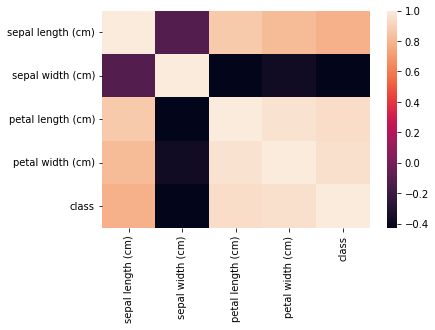

In [16]:
import seaborn as sns

sns.heatmap(df.corr())

Utilizarei como features: "Petal Width"

In [48]:
features = ['sepal width (cm)','petal width (cm)']
target = 'class'

X = df[ features ]
y = df[ target ]

In [49]:
X.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [50]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Treinamento

In [82]:
def train_and_plot(kernel):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt

    model = SVC(kernel=kernel)
    model.fit(X, y)

    plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=model, legend=2)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('SVM (kernel={})'.format(kernel))
    plt.show()

    return model

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


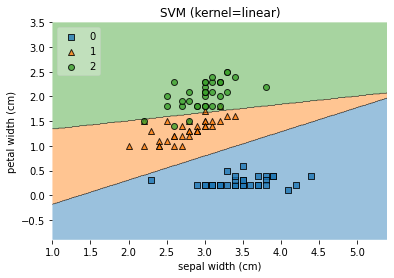

In [83]:
model_linear = train_and_plot('linear')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


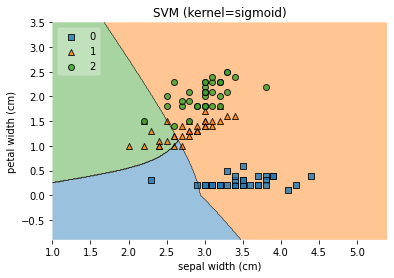

In [84]:
model_sigmoid = train_and_plot('sigmoid')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


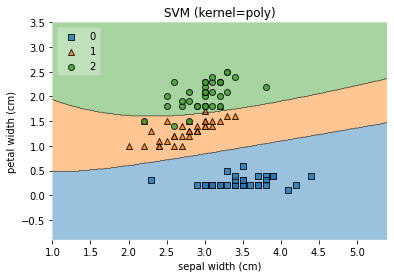

In [85]:
model_poly = train_and_plot('poly')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


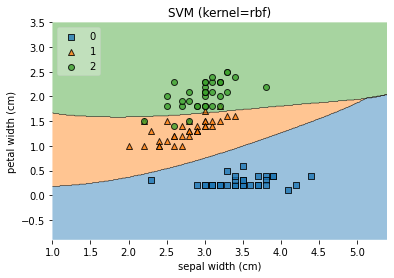

In [86]:
model_rbf = train_and_plot('rbf')

In [87]:
for name, model in [('linear',model_linear), ('rbf', model_rbf), ('poly',model_poly), ('sigmoid',model_sigmoid)]:
    y_pred = model.predict(X_test)
    print( name, "\n", classification_report(y_test, y_pred), "\n")

linear 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
 

rbf 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
 

poly 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
